## Import necessary libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import math as m

In [5]:
data = pd.read_csv('world_population_data.csv')

data.head()

,Year,World_Population
0,2020,"7,794,798,739"
1,2019,"7,713,468,100"
2,2018,"7,631,091,040"
3,2017,"7,547,858,925"
4,2016,"7,464,022,049"


In [7]:
for col_name in data.columns:
    col_name.lower()


In [9]:
data.columns

Index(['Year', 'World_Population'], dtype='object')

## Changing the data type of world_population column

In [13]:
data['World_Population'] = data['World_Population'].str.replace(',' , '')

data.head()

,Year,World_Population
0,2020,7794798739
1,2019,7713468100
2,2018,7631091040
3,2017,7547858925
4,2016,7464022049


## Changing datatype to integer

In [16]:
data['World_Population'] = data['World_Population'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Year              94 non-null     int64
 1   World_Population  94 non-null     int64
dtypes: int64(2)
memory usage: 1.6 KB


## Creating a new column 'log_pop' which is the logarithm of population

In [21]:
data['log_pop'] = [m.log(x) for x in data['World_Population']]

In [23]:
data

,Year,World_Population,log_pop
0,2020,7794798739,22.776723
1,2019,7713468100,22.766234
2,2018,7631091040,22.755497
3,2017,7547858925,22.744530
4,2016,7464022049,22.733360
...,...,...,...
89,-1000,50000000,17.727534
90,-2000,27000000,17.111347
91,-3000,14000000,16.454568
92,-4000,7000000,15.761421


## Filtering data where year is greater than 0

In [26]:
data_filtered = data[data['Year']>0]

## Sorting the data by the Year column

In [29]:
data_filtered.sort_values(by=['Year'], ascending = True)

,Year,World_Population,log_pop
86,200,190000000,19.062535
85,600,200000000,19.113828
84,700,210000000,19.162618
83,800,220000000,19.209138
82,900,240000000,19.296149
...,...,...,...
4,2016,7464022049,22.733360
3,2017,7547858925,22.744530
2,2018,7631091040,22.755497
1,2019,7713468100,22.766234


## Creating a scatter plot

[Text(0.5, 1.0, 'Log_population vs Year')]

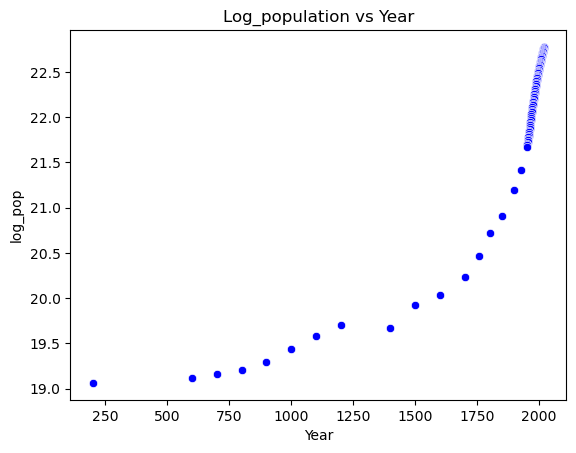

In [34]:
(sns.scatterplot(x = data_filtered['Year'],
                y = data_filtered['log_pop'],
                color = 'blue')
 .set(title = 'Log_population vs Year'))

## Applying linear regression

In [39]:
X = data_filtered.iloc[:,0:1]

X

,Year
0,2020
1,2019
2,2018
3,2017
4,2016
...,...
82,900
83,800
84,700
85,600


In [41]:
X.values

array([[2020],
       [2019],
       [2018],
       [2017],
       [2016],
       [2015],
       [2014],
       [2013],
       [2012],
       [2011],
       [2010],
       [2009],
       [2008],
       [2007],
       [2006],
       [2005],
       [2004],
       [2003],
       [2002],
       [2001],
       [2000],
       [1999],
       [1998],
       [1997],
       [1996],
       [1995],
       [1994],
       [1993],
       [1992],
       [1991],
       [1990],
       [1989],
       [1988],
       [1987],
       [1986],
       [1985],
       [1984],
       [1983],
       [1982],
       [1981],
       [1980],
       [1979],
       [1978],
       [1977],
       [1976],
       [1975],
       [1974],
       [1973],
       [1972],
       [1971],
       [1970],
       [1969],
       [1968],
       [1967],
       [1966],
       [1965],
       [1964],
       [1963],
       [1962],
       [1961],
       [1960],
       [1959],
       [1958],
       [1957],
       [1956],
       [1955],
       [19

In [45]:
y = data_filtered.iloc[:,2].values

In [49]:
lin_reg = LinearRegression().fit(X,y)

## Plotting the linear regression 

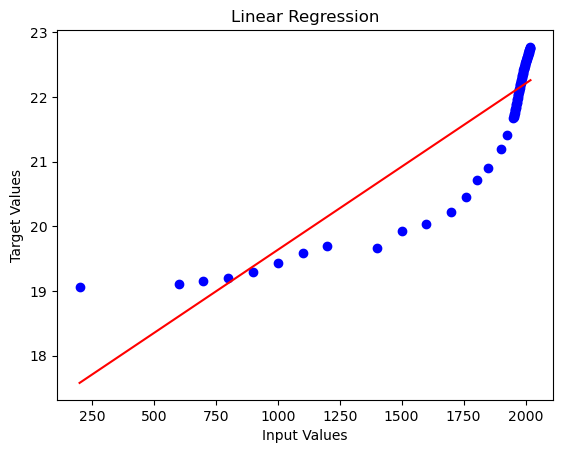

In [52]:
plt.scatter(X,y,color='blue')
plt.plot(X,lin_reg.predict(X), color= 'red')
plt.title('Linear Regression')
plt.xlabel('Input Values')
plt.ylabel('Target Values')
plt.show()